# Scientific modules and Jupyter notebooks

original from Nikolay Koldunov
This is part of his [**Python for Geosciences**](https://github.com/koldunovn/python_for_geosciences) notes.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

## Core scientific packages

When people say that they do their scientific computations in Python it's only half true. 
Python is a construction set, similar to MITgcm or other models. 
Without packages it's only a core, that although very powerful, does not seems to be able to do much by itself.

#### Code execution

In [2]:
print('I love Python')

I love Python


#### Text (Markdown)

IPython [website](http://ipython.org/).

List:

* [Python on Codeacademy](http://www.codecademy.com/tracks/python)
* [Google's Python Class](https://developers.google.com/edu/python/)

Code:

    print('hello world')


#### $\LaTeX$ equations

$$\int_0^\infty e^{-x^2} dx=\frac{\sqrt{\pi}}{2}$$
$$
F(x,y)=0 ~~\mbox{and}~~
\left| \begin{array}{ccc}
  F''_{xx} & F''_{xy} &  F'_x \\
  F''_{yx} & F''_{yy} &  F'_y \\
  F'_x     & F'_y     & 0 
  \end{array}\right| = 0
$$

#### Plots

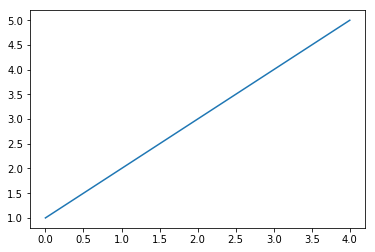

In [3]:
x = [1,2,3,4,5]
plt.plot(x);

#### Rich media

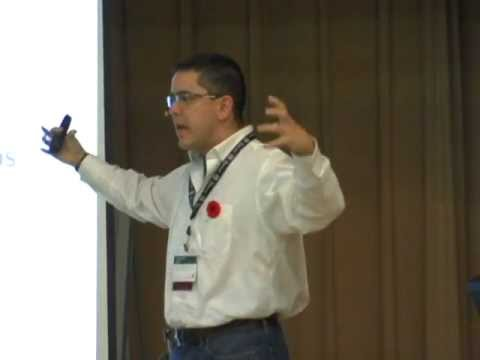

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('F4rFuIb1Ie4')

* [IPython website](http://ipython.org/)
* [Notebook gallery](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks) 

## Warnings

### Warning 1
Do not use the Python keywords 'and' and 'or' to combine logical array expressions. 
These keywords will test the truth value of the entire array (not element-by-element as you might expect). 
Use the bitwise operators & and | instead.

### Warning 2
The bit-wise operators & and | are the proper way to perform element-by-element array comparisons. 
Be sure you understand the operator precedence: (a > 2) & (a < 5) is the proper syntax 
because a > 2 & a < 5 will result in an error due to the fact that 2 & a is evaluated first.

### Warning 3
the behavior of maximum(a, b) is different than that of max(a, b). As a ufunc, maximum(a, b) performs an 
element-by-element comparison of a and b and chooses each element of the result according to which element 
in the two arrays is larger. In contrast, max(a, b) treats the objects a and b as a whole, looks at the 
(total) truth value of a > b and uses it to return either a or b (as a whole). A similar difference exists 
between minimum(a, b) and min(a, b).

## Main Jupyter notebook features

### Getting help

You can use question mark in order to get help. To execute cell you have to press *Shift+Enter*

In [ ]:
?

Question mark after a function will open pager with documentation. Double question mark will show you source code of the function. 

In [6]:
plt.plot??

Signature: plt.plot(*args, **kwargs)
Source:   
@_autogen_docstring(Axes.plot)
def plot(*args, **kwargs):
    ax = gca()
    # Deprecated: allow callers to override the hold state
    # by passing hold=True|False
    washold = ax._hold
    hold = kwargs.pop('hold', None)
    if hold is not None:
        ax._hold = hold
        from matplotlib.cbook import mplDeprecation
        warnings.warn("The 'hold' keyword argument is deprecated since 2.0.",
                      mplDeprecation)
    try:
        ret = ax.plot(*args, **kwargs)
    finally:
        ax._hold = washold

    return ret
File:      ~/miniconda3/envs/pangeo/lib/python3.6/site-packages/matplotlib/pyplot.py
Type:      function


Press SHIFT+TAB after opening bracket in order to get help for the function (list of arguments, doc string).

In [ ]:
plt.plot

### Accessing the underlying operating system

You can access system functions by typing exclamation mark.

In [7]:
!pwd

/home/home2/nhn2/notebooks


If you already have some netCDF file in the directory and *ncdump* is installed, you can for example look at its header.

In [8]:
!ncdump -h nino34_index.nc

netcdf nino34_index {
dimensions:
	time = 684 ;
variables:
	int64 time(time) ;
		time:units = "days since 1960-01-01" ;
		time:calendar = "proleptic_gregorian" ;
	string nino34(time) ;
	float oni(time) ;
		oni:_FillValue = NaNf ;
}


Example of [cdo](https://code.zmaw.de/projects/cdo) usage:

In [9]:
!cdo nyear nino34_index.nc

57
cdo nyear: Processed 1 variable over 684 timesteps ( 0.01s )


Get information from OS output to the python variable

In [10]:
nmon = !cdo nmon nino34_index.nc
nmon[1]

'684'

Return information from Python variable to the SHELL

In [11]:
!echo {nmon[1]}

684


## Magic functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features.

Let's create some set of numbers using [range](http://docs.python.org/2/library/functions.html#range) command:

In [12]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

And find out how long does it take to run it with *%timeit* magic function:

In [15]:
%time list(range(10))

809 ns ± 83.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Print all interactive variables (similar to Matlab function):

In [16]:
%whos

Variable       Type      Data/Info
----------------------------------
YouTubeVideo   type      <class 'IPython.lib.display.YouTubeVideo'>
nmon           SList     ['cdo nmon: Processed 1 v<...>esteps ( 0.01s )', '684']
plt            module    <module 'matplotlib.pylab<...>ges/matplotlib/pylab.py'>
x              list      n=5


### Cell-oriented magic

Receive as argument both the current line where they are declared and the whole body of the cell. 

In [17]:
%%timeit
range(10)
range(100)

338 ns ± 24.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


There are several cell-oriented magic functions that allow you to run code in other languages:

In [18]:
%%bash

echo "My shell is:" $SHELL

My shell is: /bin/bash


In [19]:
%%perl

$variable = 1;
print "The variable has the value of $variable\n";

The variable has the value of 1


You can write content of the cell to a file with *%%writefile* (or *%%file* for ipython < 1.0):

In [20]:
%%writefile hello.py
#if you use ipython < 1.0, use %%file comand
#%%file 
a = 'hello world!'
print(a)

Overwriting hello.py


In [21]:
!cat hello.py

#if you use ipython < 1.0, use %%file comand
#%%file 
a = 'hello world!'
print(a)

And then run it:

In [22]:
%run hello.py

hello world!


<Figure size 432x288 with 0 Axes>

The *%run* magic will run your python script and load all variables into your interactive namespace for further use.

In [23]:
%whos

Variable       Type      Data/Info
----------------------------------
YouTubeVideo   type      <class 'IPython.lib.display.YouTubeVideo'>
a              str       hello world!
nmon           SList     ['cdo nmon: Processed 1 v<...>esteps ( 0.01s )', '684']
plt            module    <module 'matplotlib.pylab<...>ges/matplotlib/pylab.py'>
x              list      n=5


In order to get information about all magic functions type:

In [24]:
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

### Links:

[The cell magics in IPython](http://nbviewer.ipython.org/urls/raw.github.com/ipython/ipython/1.x/examples/notebooks/Cell%20Magics.ipynb)